#Análise das Notas do ENEM para Entender o Impacto da Pandemia na Educação Brasileira

Este notebook apresenta uma análise das notas do Exame Nacional do Ensino Médio (ENEM) com o objetivo de investigar o impacto da pandemia do COVID-19 na educação brasileira. Utilizando [dados](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/sinopses-estatisticas/enem) disponibilizados pelo [INEP - Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira](https://www.gov.br/inep/pt-br/acesso-a-informacao/institucional/sobre), foi explorada as tendências nas médias das notas por região, as dinâmicas das notas por disciplina e as variações no número de inscritos ao longo dos anos 2011 a 2022.

#**Principais Etapas do Projeto:**

##**1. Contextualização:**
Apresenta um breve contexo de análise e as perguntas a serem respondidas.

##**2. Coleta de Dados:**
Utilizando dados do ENEM disponibilizados pelo INEP, foram segregadas as informações sobre notas por região, notas por disciplina e número de inscritos. Para isso, foram utilizadas as bibliotecas `pandas` e `zipfile` para extrair e moldar os dados.


##**3. Análise e Visualização:**


1. **Análise das Notas por Região:** Foram investigadas as médias das notas do ENEM por região do Brasil ao longo dos anos, buscando entender padrões e variações regionais. Bibliotecas utilizadas: `pandas` e `matplotlib`.


2. **Dinâmica das Notas por Disciplina:** Foram analisadas as médias das notas por disciplina para identificar possíveis mudanças na performance dos alunos em diferentes áreas de conhecimento. Bibliotecas utilizadas: `pandas` e `matplotlib`.


3. **Tendências no Número de Inscritos:** Foi exploradas as tendências no número de inscritos no ENEM ao longo dos anos, a fim de quantificar o impacto da pandemia na participação dos alunos. Bibliotecas utilizadas: `pandas` e `matplotlib`.


4. **Visualização Geoespacial:** Para melhor entendimento do panorama apresentado, foram construidas visualizações geoespaciais para mapear as médias das notas e o número de inscritos por estado, oferecendo insights adicionais sobre as disparidades regionais. Bibliotecas utilizadas: `geopandas` e `folium`.

##**4. Conclusão:**
 Apresenta a conclusão da análise.

##**5. Referências:**
Apresenta as referencias utilizadas.




#**1. Contextualização:**


A pandemia de COVID-19 teve um impacto significativo em diversas áreas da sociedade e a educação não foi uma exceção. Com o fechamento das escolas e a transição para o ensino remoto, surgiram preocupações sobre o impacto desse novo cenário na aprendizagem dos estudantes.

O Exame Nacional do Ensino Médio (ENEM) é uma importante ferramenta de avaliação da qualidade da educação no Brasil e sua análise pode fornecer insights valiosos sobre como a pandemia afetou o desempenho dos alunos.

Neste contexto, este notebook se propõe a responder a algumas questões-chave:

- *Quais foram os impactos da pandemia na média das notas dos estudantes?*
- *Quais os impactos no número de inscritos no ENEM ao longo dos anos?*
- *Algumas regiões foram mais afetadas que outras?*

Para responder essas perguntas, foram utilizadas as médias das notas do ENEM durante os anos 2011 a 2022, bem como seu número de inscritos para basear as análises.

#**2. Coleta de Dados**

O site do INEP disponibiliza vários estudos referentes a educação do país. Os dados de interesse desse projeto estão disponibilizados em formato *.xlsx* o qual estão dentro de um arquivo *.zip* para cada ano, conforme a imagem a seguir:

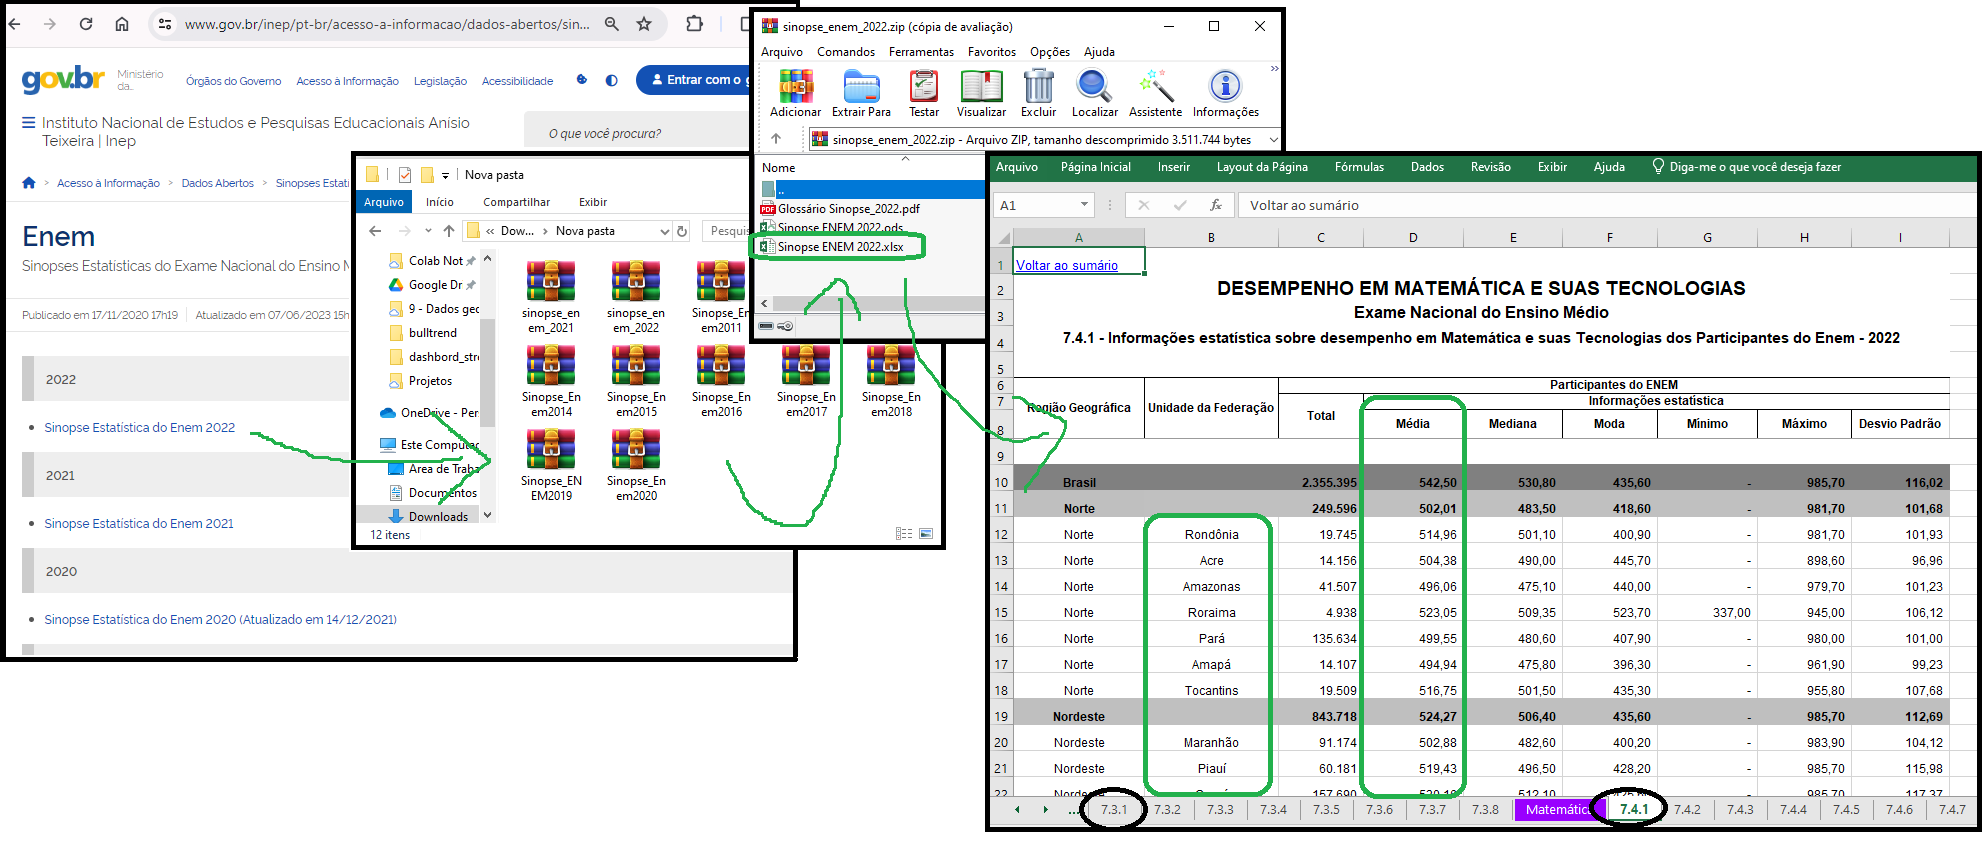

Os arquivos zip foram baixados e carregados na nuvem do Google Drive.

O codigo abaixo itera sobra cada arquivo zip, encontra  o arquivo xlsx de interesse, abre o arquivo, encontra as abas a serem analisadas e guarda o trecho de cada aba em 2 variáveis:

- uma para receber as notas dos estudantes `dataframes_notas` e;
- outra para receber o número de inscritos `dataframe_n_incritos`.


In [ ]:
import zipfile
import pandas as pd

base_dados = [i + 2011 for i in range(12)]
base_dados= list(reversed(base_dados))

abas_a_ler = ['7.5.1', '7.4.1', '7.3.1', '7.2.1', '7.1.1', '1.1']
nome_abas = ['Redacao', 'Matematica', 'Linguagens e códigos', 'Ciencias humanas', 'Ciencias da natureza', 'Nº incritos']

# Dicionário para armazenar os DataFrames de cada aba de cada arquivo
dataframes_notas = {}
dataframe_n_incritos = {}

for ano in base_dados:
    dfs_por_arquivo = {}  # Dicionário para armazenar os DataFrames de cada aba para um arquivo

    with zipfile.ZipFile(f'/content/drive/MyDrive/Colab Notebooks/Projetos/Análise ENEM pós COVID no Brasil (2011-2022)/Dados INEP/Sinopse_Enem{ano}.zip') as arq_zip:
        for nome_arquivo in arq_zip.namelist():
            if nome_arquivo.endswith('.xlsx'):
                with arq_zip.open(nome_arquivo) as arquivo_excel:
                    df_por_arquivo = {}  # Dicionário para armazenar os DataFrames de cada aba

                    for aba, nome in zip(abas_a_ler,nome_abas):
                        try:
                            # Ler a matriz A8:C40 da aba referente ao número de inscrições de cada arquivo excel
                            if aba == '1.1':
                                df_aba_n = pd.read_excel(arquivo_excel, sheet_name=aba, usecols="A:C", skiprows=8, nrows=32)
                                df_aba_n['Ano'] = ano
                                df_aba_n.dropna(inplace = True)
                            else:
                                # Ler a matriz A6:I42 das abas referentes as notas das disciplinas de cada arquivo excel
                                df_aba = pd.read_excel(arquivo_excel, sheet_name=aba, usecols="A:I", skiprows=5, nrows=37)
                                df_por_arquivo[nome] = df_aba
                                df_aba['Disciplina'] = nome
                                df_aba['Ano'] = ano
                                df_aba.dropna(inplace = True)
                        except:
                            print(f'Aba {aba} não encontrada no arquivo {nome_arquivo}.')

                    # Adiciona o dicionário de DataFrames de cada aba para o dicionário de DataFrames por arquivo
                    dfs_por_arquivo[nome_arquivo] = df_por_arquivo
                    dataframe_n_incritos[nome_arquivo] = df_aba_n


    # Atualiza o dicionário geral de DataFrames de cada aba para incluir os DataFrames deste arquivo
    dataframes_notas.update(dfs_por_arquivo)

In [ ]:
#Montando um dataframe com os números de inscritos
nome_colunas = ['Região', 'Estado','Nº inscritos', 'Ano']
dfs_temp = []

for df in dataframe_n_incritos.values():
    df.columns = nome_colunas
    dfs_temp.append(df)

df_inscritos = pd.concat(dfs_temp, ignore_index=False)
df_inscritos.reset_index(inplace=True, drop=True)
df_inscritos

,Região,Estado,Nº inscritos,Ano
0,Norte,Rondônia,32107,2022
1,Norte,Acre,22248,2022
2,Norte,Amazonas,80976,2022
3,Norte,Roraima,8430,2022
4,Norte,Pará,203914,2022
...,...,...,...,...
319,Sul,Rio Grande do Sul,330463,2011
320,Centro-Oeste,Mato Grosso do Sul,122626,2011
321,Centro-Oeste,Mato Grosso,132923,2011
322,Centro-Oeste,Goiás,152701,2011


In [ ]:
#verificando a qualidade dos dados da tabela referente ao número de inscritos
df_inscritos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Região        324 non-null    object
 1   Estado        324 non-null    object
 2   Nº inscritos  324 non-null    int64 
 3   Ano           324 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 10.2+ KB


In [ ]:
#Montando um dataframe com as notas de cada disciplina
dfs_temp = []

for arquivo in dataframes_notas.values():
    for df_aba in arquivo.values():
        dfs_temp.append(df_aba)

# Concatena todos os DataFrames da lista em um único DataFrame
df_notas = pd.concat(dfs_temp, ignore_index=True).reset_index(drop=True)
df_notas = df_notas.rename(columns={'Unnamed: 3': 'Média', 'Unnamed: 4': 'Mediana', 'Unnamed: 5': 'Moda', 'Unnamed: 6': 'Mínimo', 'Unnamed: 7': 'Máximo', 'Unnamed: 8': 'Desvio Padrão'})
df_notas

,Região Geográfica,Unidade da Federação,Participantes do ENEM,Média,Mediana,Moda,Mínimo,Máximo,Desvio Padrão,Disciplina,Ano
0,Norte,Rondônia,19766,625.784681,620,600,40,980,153.538083,Redacao,2022
1,Norte,Acre,14419,616.338165,600,560,40,980,154.464754,Redacao,2022
2,Norte,Amazonas,41781,591.175415,580,560,40,1000,143.326444,Redacao,2022
3,Norte,Roraima,4949,623.228935,600,560,120,980,150.566702,Redacao,2022
4,Norte,Pará,134659,629.201761,600,560,40,980,160.510983,Redacao,2022
...,...,...,...,...,...,...,...,...,...,...,...
1615,Sul,R. G. do Sul,250042,471.344184,472.6,269,269,851,77.363398,Ciencias da natureza,2011
1616,Centro-Oeste,M. G. do Sul,91089,453.205631,451,446.5,269,849.6,77.187694,Ciencias da natureza,2011
1617,Centro-Oeste,Mato Grosso,94672,448.72785,447,269,269,841.3,76.112488,Ciencias da natureza,2011
1618,Centro-Oeste,Goiás,110559,464.264564,460.7,269,269,857.5,83.075593,Ciencias da natureza,2011


In [ ]:
#verificando a qualidade dos dados da tabela referente as notas
df_notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Região Geográfica      1620 non-null   object
 1   Unidade da Federação   1620 non-null   object
 2   Participantes do ENEM  1620 non-null   object
 3   Média                  1620 non-null   object
 4   Mediana                1620 non-null   object
 5   Moda                   1620 non-null   object
 6   Mínimo                 1620 non-null   object
 7   Máximo                 1620 non-null   object
 8   Desvio Padrão          1620 non-null   object
 9   Disciplina             1620 non-null   object
 10  Ano                    1620 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 139.3+ KB


In [ ]:
#corrige o tipo dos dados das colunas alterando os números para float e int64
df_notas = df_notas.apply(pd.to_numeric, errors = 'ignore')

In [ ]:
df_notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Região Geográfica      1620 non-null   object 
 1   Unidade da Federação   1620 non-null   object 
 2   Participantes do ENEM  1620 non-null   int64  
 3   Média                  1620 non-null   float64
 4   Mediana                1620 non-null   float64
 5   Moda                   1620 non-null   float64
 6   Mínimo                 1620 non-null   float64
 7   Máximo                 1620 non-null   float64
 8   Desvio Padrão          1620 non-null   float64
 9   Disciplina             1620 non-null   object 
 10  Ano                    1620 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 139.3+ KB


#**3. Análise e Visualização:**

**Quais foram os impactos da pandemia na média das notas dos estudantes?**

Vamos tentar responder essa pergunta com vizualizações dos dados. Vejamos:

##**3.1 - Análise das Notas por Região:**

Para criar uma visualização das notas por região ao longo dos anos, criei um DataFrame utilizando o método do Pandas `crosstab()` e utilizando o df `dataframes_notas`, criado anteriormente. Passei a coluna 'Região Geográfica' no parametro `index`, no parametro `columns` passei a coluna 'Ano' e a coluna 'Médias' no parametro `values`. A função agregadora `aggfunc` foi utilizado o `mean` para obter as médias das regiões.

In [ ]:
por_regiao = pd.crosstab(df_notas['Região Geográfica'], df_notas['Ano'], values = df_notas['Média'], aggfunc = 'mean')
por_regiao

Ano,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Região Geográfica,,,,,,,,,,,,
Centro-Oeste,496.174172,489.925725,494.635217,495.608548,504.213275,508.239422,521.843305,525.543306,521.521198,525.031667,534.714141,544.823190
Nordeste,487.955595,484.757877,488.396035,486.397814,498.119444,501.613426,510.639652,515.494455,512.311426,512.341540,523.758316,534.854770
Norte,478.241766,473.294488,478.511770,476.697122,488.627958,491.166387,499.897810,502.146867,497.379925,497.652337,509.297230,521.192935
Sudeste,521.770910,518.642963,518.486563,517.676233,523.623536,528.010393,537.787748,545.233817,540.738678,546.790461,554.470593,564.010054
Sul,518.170728,511.742062,512.001057,513.531017,520.908406,522.199738,537.151661,541.131791,536.655905,542.638315,548.401282,558.565089


Para plotar o gráfico utilizei a biblioteca `matplotlib.pyplot`, apelidando a como `plt`, usualmente feito entre os usuarios desta biblioteca.

In [ ]:
import matplotlib.pyplot as plt

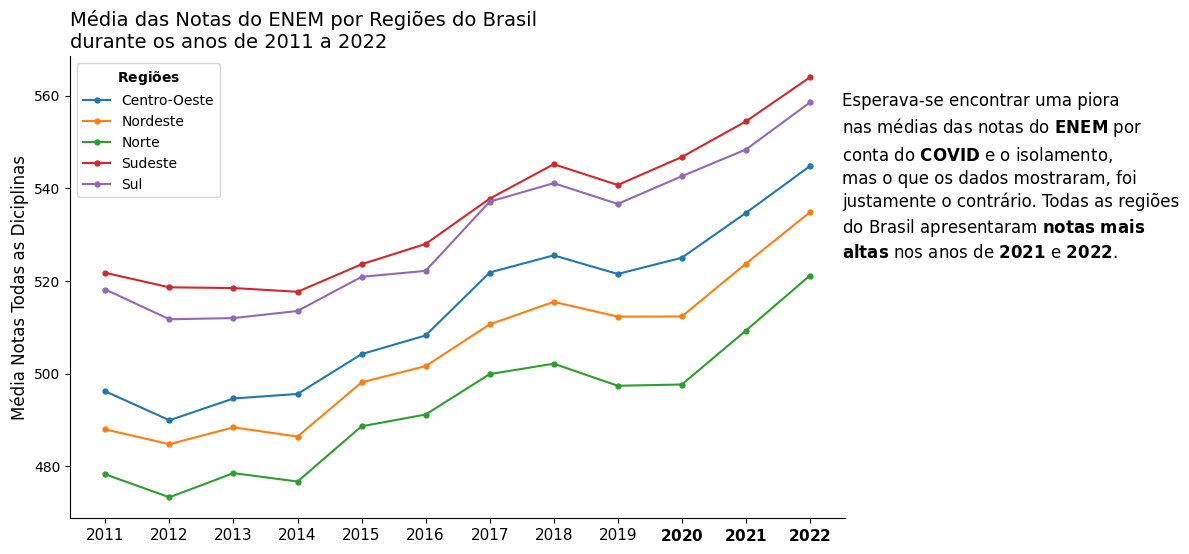

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
for idx, row in por_regiao.iterrows():
    plt.plot(row.index, row.values, label=idx, marker = 'o', markersize = 3.5)
plt.title('Média das Notas do ENEM por Regiões do Brasil\ndurante os anos de 2011 a 2022', loc = 'left', size = 14)
plt.xticks(range(2011, 2023), [f'$\\bf{i}$' if i in [2020,2021,2022] else i for i in range(2011,2023)], size = 11)
plt.yticks(size = 10)
plt.ylabel('Média Notas Todas as Diciplinas', size = 12)
plt.legend(title='$\mathbf{Regiões}$')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.text(2022.5, 525, 'Esperava-se encontrar uma piora\nnas médias das notas do $\\bf{ENEM}$ por\nconta do $\\bf{COVID}$ e o isolamento,\nmas o que os dados mostraram, foi\njustamente o contrário. Todas as regiões\ndo Brasil apresentaram $\\bf{notas\ mais}$\n$\\bf{altas}$ nos anos de $\\bf{2021}$ e $\\bf{2022}$.', linespacing = 1.35,fontsize = 12 )
plt.show()


Primeiramente acho que cabe um esclarecimento, é sabido que os eixos dos gráficos, pricipalemnte o eixo `y`, se iniciem no '0' para que não haja um viés de interpretação dos dados. Mas a intenção aqui foi mostrar a relação das variáveis mais detalhadamente. Por isso, utilizei valores diferentes de '0' nos eixos para enfatizar mais os dados.

Ao analizar o gráfico obtive a surpresa por constatar que a média das notas aumentaram nos anos de pandemia! O esperado era encontrar notas ruins visto todas as dificuldades impostas pela COVID.

O que me deixou bastante intrigado...

Como assim as notas aumentaram? A pandemia fez um bem para educação dos alunos do ensino médio?

Parti então para as análises das médias das notas por disciplina em todo o país.

##**3.2 - Dinâmica das Notas por Disciplina:**

Para criar a visualização das notas médias de cada disciplita de todo o país durante os anos, fiz baiscametne da mesma forma que no gráfico anterior. Porém neste, foi passada a coluna 'Disciplina' no parâmetro `index`, o restante segue igual.

In [ ]:
por_disciplina = pd.crosstab(df_notas['Disciplina'], df_notas['Ano'], values = df_notas['Média'], aggfunc = 'mean')
por_disciplina

Ano,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Disciplina,,,,,,,,,,,,
Ciencias da natureza,455.809651,463.570403,462.191862,476.052618,473.011109,472.612168,506.064616,487.536786,471.627538,484.583497,485.821198,491.343643
Ciencias humanas,468.930573,513.307115,513.078388,539.990464,552.138170,527.751845,511.755152,560.651943,500.446673,503.640998,512.178594,520.469894
Linguagens e códigos,512.230704,484.805645,481.771216,499.886829,497.625156,514.223252,503.546885,519.161384,514.487606,516.643362,494.773210,510.446283
Matematica,501.865388,492.431424,498.316136,462.840746,457.054850,481.574937,509.399088,525.903960,513.091855,509.594202,524.356218,532.221403
Redacao,536.272060,498.734163,513.834435,485.709409,534.530562,534.260765,551.645506,510.631487,583.951795,579.953436,627.472304,644.235762


Para fazer uma anotação mais agradável e também para atrair a atenção do leitor para o que mais importa no gráfico, utilizei uma função criada e disponibilizada no https://github.com/empathy87/storytelling-with-data .

Essa função faz com que os textos fiquem coloridos por trechos. Bem legal para explicar melhor os dados. Veja como fica mais atrativo e fácil de entender:

In [ ]:
# Função para escrita de texto utilizando diferentes cores. Não existe uma
# função nativa para isso. (Adaptado de https://github.com/empathy87/storytelling-with-data)
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

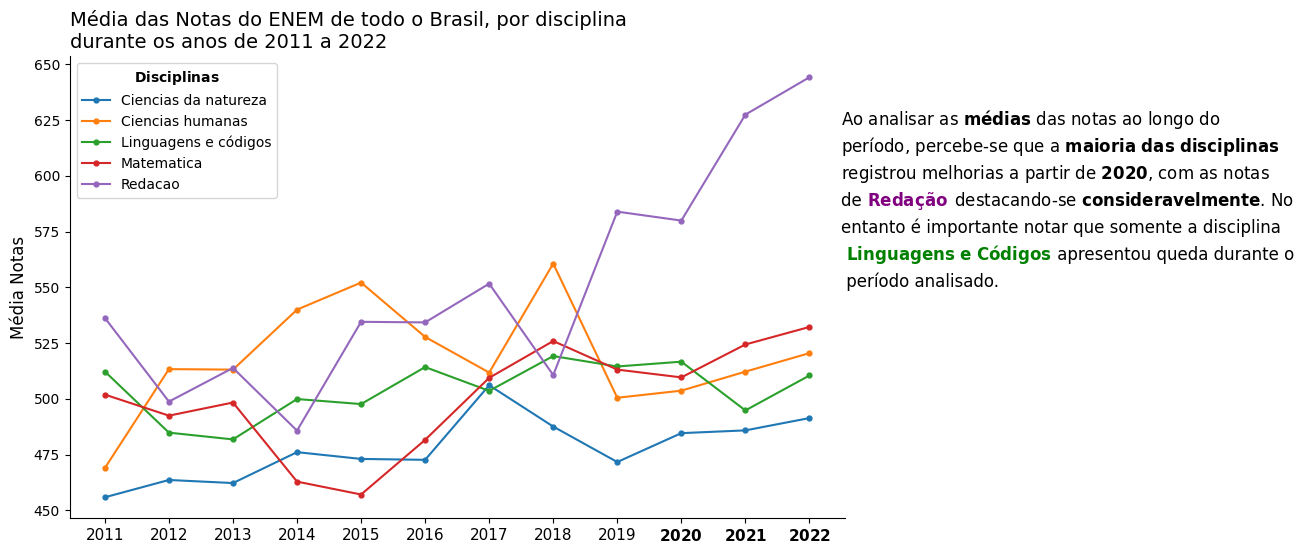

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
for idx, row in por_disciplina.iterrows():
    plt.plot(row.index, row.values, label=idx, marker = 'o', markersize = 3.5)
plt.title('Média das Notas do ENEM de todo o Brasil, por disciplina\ndurante os anos de 2011 a 2022',size = 14, loc = 'left')
plt.xticks(range(2011, 2023), [f'$\\bf{i}$' if i in [2020,2021,2022] else i for i in range(2011,2023)], size = 11)
plt.ylabel('Média Notas', size = 12)
plt.yticks(size = 10)
plt.legend(title='$\\bf{Disciplinas}$')
texto_colorido(2022.5,550,
               'Ao analisar as $\\bf{médias}$ das notas ao longo do\n'
               'período, percebe-se que a $\\bf{maioria\ das\ disciplinas}$\n'
               'registrou melhorias a partir de $\\bf{2020}$, com as notas\n'
               'de ||$\\bf{Redação}$ || destacando-se $\\bf{consideravelmente}$. No\n'
               'entanto é importante notar que somente a disciplina\n '
               '$\\bf{Linguagens\ e\ Códigos}$|| apresentou queda durante o\n '
               'período analisado.',
               [['black'],['black'],['black'],['black', 'purple', 'black'],['black'],['green','black'],['black']],
               esp = 27,
               ax=ax,
               fontsize = 12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


Como se concluiu no gráfico acima, quase todas as notas melhoraram suas médias na pandemia, com destaque para Redação.

Mais ainda não satisfeito, segui então para uma análise do número de inscritos durante os anos.

##**3.3 - Tendências no Número de Inscritos:**

**Quais os impactos nos números de inscritos no ENEM ao longo dos anos?**

Para criar a visualização das tendências dos números de inscritos, utilizei novamente a função `crosstab`, porém com o df `dataframe_n_incritos`.

In [ ]:
por_inscritos = pd.crosstab(df_inscritos['Região'], df_inscritos['Ano'], values = df_inscritos['Nº inscritos'], aggfunc = 'sum')
por_inscritos

Ano,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Região,,,,,,,,,,,,
Centro-Oeste,483387,522371,620653,772677,705309,756319,561617,464641,423005,513376,302231,310462
Nordeste,1693711,1826276,2358581,2877720,2481197,2816054,2223044,1812239,1741107,1948494,1181578,1212182
Norte,553408,590600,746064,950238,815311,956115,795572,616950,598987,731034,391206,399922
Sudeste,1980736,2119280,2561553,3076856,2824846,3081767,2441777,2015896,1793813,1982112,1140569,1169311
Sul,669614,732538,886712,1044757,919764,1017112,709331,604021,538358,608117,374248,384228


Fiz um df para encontrar o percentual de queda do ano de 2020 para 2021.

In [ ]:
queda2020_2021 = por_inscritos[[2020,2021]].copy()
queda2020_2021['Percentual'] = round(((queda2020_2021[2020] - queda2020_2021[2021]) / queda2020_2021[2020])*100,2)
queda2020_2021

Ano,2020,2021,Percentual
Região,,,
Centro-Oeste,513376,302231,41.13
Nordeste,1948494,1181578,39.36
Norte,731034,391206,46.49
Sudeste,1982112,1140569,42.46
Sul,608117,374248,38.46


In [ ]:
perc_queda = round(queda2020_2021['Percentual'].mean(),2)
perc_queda

41.58

Achei válido plotar uma trajetória do números do Brasil inteiro no mesmo gráfico com as regiões do país. Para tanto, fiz uma Series para receber a soma das médias das regiões.

In [ ]:
df_brasil = por_inscritos.sum(axis = 0)
df_brasil

Ano
2011    5380856
2012    5791065
2013    7173563
2014    8722248
2015    7746427
2016    8627367
2017    6731341
2018    5513747
2019    5095270
2020    5783133
2021    3389832
2022    3476105
dtype: int64

Abaixo fiz a plotagem do gráfico com um textinho ao lado explicando o *insight* mais importante do mesmo. Veja:

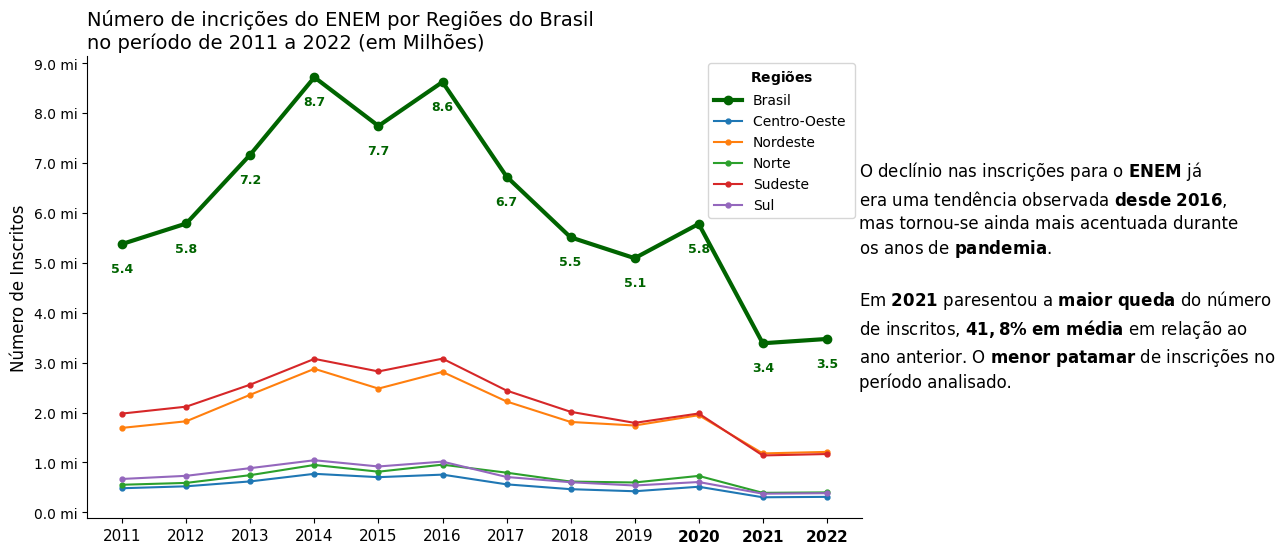

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
plt.plot(df_brasil.index, df_brasil, label = 'Brasil', marker = 'o', markersize = 6, linewidth = 3, color = 'darkgreen')
for idx, row in por_inscritos.iterrows():
    plt.plot(row.index, row.values, label=idx, marker = 'o', markersize = 3.5)
plt.title('Número de incrições do ENEM por Regiões do Brasil\nno período de 2011 a 2022 (em Milhões)', fontsize = 14, loc ='left')
y_labels = [f'{i/1e6} mi' for i in range(0, 10000000, 1000000)]
plt.xticks(range(2011, 2023), [f'$\\bf{i}$' if i in [2020,2021,2022] else i for i in range(2011,2023)], size = 11)
plt.yticks(range(0, 10000000, 1000000), y_labels, size= 10)
plt.ylabel('Número de Inscritos', size = 12)
plt.legend(title='$\mathbf{Regiões}$')
ax.text(2022.5,2.5e6,'O declínio nas inscrições para o $\\bf{ENEM}$ já\nera uma tendência observada $\\bf{desde\ 2016}$,\nmas tornou-se ainda mais acentuada durante\nos anos de $\\bf{pandemia}$.\n\nEm $\\bf{2021}$ paresentou a $\\bf{maior\ queda}$ do número\nde inscritos, $\\bf{41,8\%\ em\ média}$ em relação ao\nano anterior. O $\\bf{menor\ patamar}$ de inscrições no\nperíodo analisado.', linespacing = 1.35, size= 12)
for i,valor in enumerate(df_brasil):
    ax.text(2011+i,valor -5e5,f'{valor/1e6:.1f}'.replace(',','.'), ha = 'center', va = 'center', size = 9, fontweight = 'bold', color = 'darkgreen')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Nesta visualização, podemos concluir que a pandemia criou um obstáculo para os alunos estudarem e para a realização da prova, propriamente dita. Este fato fez com que os alunos menos motivados não se aplicassem nos estudos e por sua vez, não fizeram a prova.

Isto pode explicar o porquê das médias das notas em geral terem aumentado. Basicamente a dificuldade da situção selecinou naturalmente os melhores alunos.

Obviamente, não se pode afirmar isso, pois precisa-se de mais estudos. Porém, esta não deixa de ser uma boa hipótese.

##**3.4 - Visualização Geoespacial:**

 **Algumas regiões foram mais afetadas que outras?**

Para responder a esta pergunta podemos criar um mapa coroplético, onde as cores informam as intensidades da variável escolhida em cada região. Ou seja, no nosso caso, quanto maior a nota ou o número de inscritos, mais forte será a cor de preenchimento da região no mapa.

Podemos utilizar as bibliotecas Folium e GeoPandas para criar visualizações geoespaciais interativas, permitindo aos usuários interagir com os dados geográficos. Com essas visualizações, os usuários podem passar o mouse sobre o mapa e obter informações específicas de cada estado, tornando a análise mais envolvente e informativa.

Neste sentido, o mapa coroplético da biblioteca Folium desempenha essa tarefa de forma muito eficaz.

In [ ]:
!pip install GeoPandas

In [ ]:
import geopandas as gpd
import folium

Para ter uma base do gráfico coroplético, precisamos de um geodataframe ou um geojson que contenham os formatos dos estados. Geralmente estes dados são nomeados por uma coluna chamada `geometry`e nelas contém as informações dos poligonos ou multi-poligonos que serão plotados.

Existem vários sites que disponibilizam esses arquivos GeoJSON que contêm polígonos de diferentes regiões e/ou do mundo, como por exemplo: o GeoJSON.io, o IBGE, INPE, varios repositorio GitHub... Não é dificil encontrar.

O geojson utilizado neste projeto foi obtido no repositorio https://github.com/giuliano-macedo/geodata-br-states.

In [ ]:
# Utilizei a biblioteca geopandas para ler o arquivo:
geo_estados = gpd.read_file('https://raw.githubusercontent.com/giuliano-macedo/geodata-br-states/main/geojson/br_states.json')
geo_estados.head()

,id,fid,FID_Export,SIGLA,Total,Homens,Mulheres,Urbana,Rural,TX_Alfab,FID_estado,Estado,FK_macro,PK_sigla,geometry
0,a__031_003_estadosBrasil.1,1,0,AC,557526.0,280983,276543,370267.0,187259,65.154545,-1,Acre,N,AC,"MULTIPOLYGON (((-66.80619 -9.81446, -66.64485 ..."
1,a__031_003_estadosBrasil.2,2,1,AL,2822621.0,1378942,1443679,1919739.0,902882,59.364356,-1,Alagoas,NE,AL,"MULTIPOLYGON (((-35.15263 -8.91373, -35.15628 ..."
2,a__031_003_estadosBrasil.3,3,2,AM,2812557.0,1414367,1398190,2107222.0,705335,72.250000,-1,Amazonas,N,AM,"MULTIPOLYGON (((-67.32590 2.02976, -67.30001 1..."
3,a__031_003_estadosBrasil.4,4,3,AP,477032.0,239453,237579,424683.0,52349,83.650000,-1,Amapá,N,AP,"MULTIPOLYGON (((-50.09389 0.70205, -50.15695 0..."
4,a__031_003_estadosBrasil.5,5,4,BA,13070250.0,6462033,6608217,8772348.0,4297902,71.163373,-1,Bahia,NE,BA,"MULTIPOLYGON (((-38.64898 -18.03612, -38.65822..."


<Axes: >

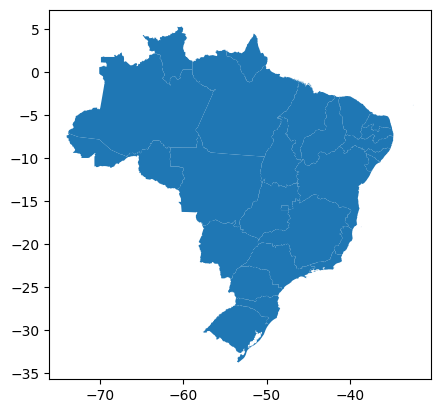

In [ ]:
#Ao plotar o mapa do Brasil, percebe-se que está certinho
geo_estados.plot()

Para criar o efeito de comparação através das cores, precisamos passar os dados geograficos dos estados (geojson) e os dados comparativos (a coluna do df  base da comparação).

Dizendo de outra forma, precisamos de dois frames: um Geodataframe com os poligonos a serem plotados e Dataframe com as informações comparativas. E ambos frames precisam ter as colunas referentes aos nome dos estados com os valores exatamente iguais.

Para verificar se as colunas são identicas, fiz um código que itera sobre os dois frames verificando se os valores são iguais e retorna um print dos valores diferentes.

In [ ]:
#codigo para encontrar os valores diferentes nos DFs

a = df_notas['Unidade da Federação'].unique()
a.sort()  # Ordena os valores únicos de 'Unidade da Federação' em ordem alfabética
b = geo_estados['Estado'].unique()
b.sort()  # Ordena os valores únicos de 'Estado' em ordem alfabética

for i, x in zip(a, b):
    if i not in b:
        print({'df_notas': i})
    if x not in a:
        print({'geo': x})
        print('--'*15)


{'df_notas': 'M. G. do Sul'}
{'geo': 'Mato Grosso do Sul'}
------------------------------
{'df_notas': 'R. G. do Norte'}
{'geo': 'Rio Grande do Norte'}
------------------------------
{'df_notas': 'R. G. do Sul'}
{'geo': 'Rio Grande do Sul'}
------------------------------


Percebe-se que **Mato Grosso do Sul**, **Rio Grande do Sul** e **Rio Grande do Norte** têm nomes diferentes nas duas base de dados.

In [ ]:
#codigo para corrigir os valores diferentes
df_notas['Unidade da Federação'] = df_notas['Unidade da Federação'].map(lambda x: x.replace('M. G. do Sul','Mato Grosso do Sul').replace('R. G. do Sul','Rio Grande do Sul').replace('R. G. do Norte','Rio Grande do Norte'))

In [ ]:
#veirifacar se os nomes foram corrigidos:
df_notas['Unidade da Federação'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [ ]:
df_notas.head()

,Região Geográfica,Unidade da Federação,Participantes do ENEM,Média,Mediana,Moda,Mínimo,Máximo,Desvio Padrão,Disciplina,Ano
0,Norte,Rondônia,19766,625.784681,620.0,600.0,40.0,980.0,153.538083,Redacao,2022
1,Norte,Acre,14419,616.338165,600.0,560.0,40.0,980.0,154.464754,Redacao,2022
2,Norte,Amazonas,41781,591.175415,580.0,560.0,40.0,1000.0,143.326444,Redacao,2022
3,Norte,Roraima,4949,623.228935,600.0,560.0,120.0,980.0,150.566702,Redacao,2022
4,Norte,Pará,134659,629.201761,600.0,560.0,40.0,980.0,160.510983,Redacao,2022


Para deixar o gráfico mais interessante, será inserido *tooltips* que vão conter as informações das disciplinas dos estados.

Para tanto, fiz um df com as médias das disciplinas por estado.

In [ ]:
notas_2022 = df_notas[df_notas['Ano']==2022].copy()
notas_2022 = pd.crosstab(notas_2022['Unidade da Federação'],notas_2022['Disciplina'], notas_2022['Média'],aggfunc = 'mean').reset_index()
notas_2022.rename(columns = {'Unidade da Federação':'Estado'}, inplace=True)
notas_2022

Disciplina,Estado,Ciencias da natureza,Ciencias humanas,Linguagens e códigos,Matematica,Redacao
0,Acre,476.793593,504.743472,497.033042,504.379288,616.338165
1,Alagoas,485.118388,511.525758,501.097378,523.598472,643.383378
2,Amapá,474.118055,504.233723,490.726274,494.939030,610.848693
3,Amazonas,473.891373,497.225287,488.127133,496.059915,591.175415
4,Bahia,485.307809,515.135206,504.823248,519.407875,640.715317
5,Ceará,486.670916,512.682702,501.366486,530.162256,652.345020
6,Distrito Federal,511.911289,544.600621,539.479277,559.604389,662.228263
7,Espírito Santo,504.848209,538.159493,525.410633,559.609309,669.243705
8,Goiás,492.036755,521.894214,511.453716,536.357518,654.109598
9,Maranhão,475.157655,497.152369,484.695323,502.881410,629.480346


Para inserir as informações deste df na funçao do gráfico coroplético, precisamos unir os poligonos geográficos de cada estado no df. Ou seja, unir a coluna `geometry` do nosso geojson no df `notas_2022`.

In [ ]:
geo_dados_notas = df_notas[df_notas['Ano'] == 2022][['Unidade da Federação', 'Média']].copy()
geo_dados_notas = geo_dados_notas.groupby('Unidade da Federação').mean().reset_index()
geo_dados_notas.rename(columns={'Unidade da Federação':'Estado'}, inplace= True)
geo_dados_notas = geo_dados_notas.merge(notas_2022, on = 'Estado').merge(geo_estados[['Estado','geometry']], on = 'Estado')
geo_dados_notas = gpd.GeoDataFrame(geo_dados_notas,geometry=geo_dados_notas['geometry'])
geo_dados_notas = geo_dados_notas.round(2)
geo_dados_notas

,Estado,Média,Ciencias da natureza,Ciencias humanas,Linguagens e códigos,Matematica,Redacao,geometry
0,Acre,519.86,476.79,504.74,497.03,504.38,616.34,"MULTIPOLYGON (((-66.80619 -9.81446, -66.64485 ..."
1,Alagoas,532.94,485.12,511.53,501.10,523.60,643.38,"MULTIPOLYGON (((-35.15263 -8.91373, -35.15628 ..."
2,Amapá,514.97,474.12,504.23,490.73,494.94,610.85,"MULTIPOLYGON (((-50.09389 0.70205, -50.15695 0..."
3,Amazonas,509.30,473.89,497.23,488.13,496.06,591.18,"MULTIPOLYGON (((-67.32590 2.02976, -67.30001 1..."
4,Bahia,533.08,485.31,515.14,504.82,519.41,640.72,"MULTIPOLYGON (((-38.64898 -18.03612, -38.65822..."
5,Ceará,536.65,486.67,512.68,501.37,530.16,652.35,"MULTIPOLYGON (((-37.25302 -4.83177, -37.35688 ..."
6,Distrito Federal,563.56,511.91,544.60,539.48,559.60,662.23,"MULTIPOLYGON (((-47.52419 -15.50045, -47.50045..."
7,Espírito Santo,559.45,504.85,538.16,525.41,559.61,669.24,"MULTIPOLYGON (((-40.39565 -20.62215, -40.39649..."
8,Goiás,543.17,492.04,521.89,511.45,536.36,654.11,"MULTIPOLYGON (((-50.15818 -12.41237, -50.15952..."
9,Maranhão,517.87,475.16,497.15,484.70,502.88,629.48,"MULTIPOLYGON (((-44.00896 -2.40071, -44.01407 ..."


Pronto! Nosso GeoDataFrame das notas por estado está pronto para ser utilizado no mapa coroplético.

Agora precisamos fazer o mesmo para os dados de número de inscritos. Vamos lá:

In [ ]:
geo_dados_n_inscritos = df_inscritos[df_inscritos['Ano'] == 2022][['Estado', 'Nº inscritos']].copy()
geo_dados_n_inscritos = geo_dados_n_inscritos.merge(geo_estados[['Estado','geometry']], on = 'Estado')
geo_dados_n_inscritos['Nº inscritos formatado'] = geo_dados_n_inscritos['Nº inscritos'].apply(lambda x: '{0:,.0f}'.format(x).replace(',','.'))
geo_dados_n_inscritos = gpd.GeoDataFrame(geo_dados_n_inscritos, geometry = geo_dados_n_inscritos['geometry'])
geo_dados_n_inscritos

,Estado,Nº inscritos,geometry,Nº inscritos formatado
0,Rondônia,32107,"MULTIPOLYGON (((-62.86652 -7.97588, -62.85327 ...",32.107
1,Acre,22248,"MULTIPOLYGON (((-66.80619 -9.81446, -66.64485 ...",22.248
2,Amazonas,80976,"MULTIPOLYGON (((-67.32590 2.02976, -67.30001 1...",80.976
3,Roraima,8430,"MULTIPOLYGON (((-58.89539 1.22765, -58.89535 0...",8.430
4,Pará,203914,"MULTIPOLYGON (((-46.06094 -1.09472, -46.06666 ...",203.914
5,Amapá,22388,"MULTIPOLYGON (((-50.09389 0.70205, -50.15695 0...",22.388
6,Tocantins,29859,"MULTIPOLYGON (((-48.35616 -5.17187, -48.32089 ...",29.859
7,Maranhão,133981,"MULTIPOLYGON (((-44.00896 -2.40071, -44.01407 ...",133.981
8,Piauí,84068,"MULTIPOLYGON (((-41.75052 -2.80180, -41.73489 ...",84.068
9,Ceará,227145,"MULTIPOLYGON (((-37.25302 -4.83177, -37.35688 ...",227.145


In [ ]:
geo_estados.to_json()

Output hidden; open in https://colab.research.google.com to view.

Agora temos tudo para montar o gráfico.

Primeiro precisamos definir a área do mara que será apresentada, usando a função `folium.Map()`. Passa-se os valores de latitude, longitude, tiles, zoom_star, etc. Eu escolhi não passar nenhum *tile*, acho que assim o foco estará somente no mapa do Brasil, não dispersando a atenção do leitor.

Depois precisamos criar os mapas coropléticos com a função `folium.Choropleth()`. Lembrando Vamos utilizar os dois GeoDataFames criados anteriormente, um para as notas e outro para o número de inscritos. Ou seja, serão dois mapas.

Em seguida precisamos criar os *tooltips*, um para cada mapa cloroplético e atribuí-los em seus respectivos mapas. Utilizando a função `folium.features.GeoJson()` e dentro dela passando o `folium.features.GeoJsonTooltip()` .

Para maiores detalhes das funções, válido verificar a [documentação da biblioteca folium](https://python-visualization.github.io/folium/latest/user_guide/geojson.html).

E assim está pronta nossa visualização. Veja como ficou bacana!!!

Ao passar o mouse em cima de cada estado, é exibido um *tooltip* contendo as informações deste estado.


E ainda, clicando em 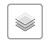 o leitor pode alterar o mapa para exibir dados das Notas do ENEM ou Número de Inscritos!

Não é o máximo isso?!

In [ ]:
mapa_brasil = folium.Map(location = [-15,-55],
                         zoom_start = 4,
                         width = 650,
                         height = 700,
                         tiles = '',
                         zoom_control = False)

Notas = folium.Choropleth(geo_data = geo_estados,
                          data = geo_dados_notas,
                          columns = ['Estado','Média'],
                          key_on = 'feature.properties.Estado',
                          fill_color = 'YlGnBu',
                          nan_fill_color = 'white',
                          bins = 10,
                          highlight=True,
                          legend_name = 'Média de Notas ENEM pelo Brasil em 2022',
                          name = 'Média Notas',
                          overlay = False).add_to(mapa_brasil)

Inscritos = folium.Choropleth(geo_data = geo_estados,
                              data = geo_dados_n_inscritos[['Estado','Nº inscritos']],
                              columns = ['Estado','Nº inscritos'],
                              key_on = 'feature.properties.Estado',
                              fill_color = 'YlOrRd',
                              nan_fill_color = 'white',
                              bins = 10,
                              highlight=True,
                              legend_name = 'Número inscritos ENEM pelo Brasil em 2022',
                              show = False,
                              name= 'Número de incritos',
                              overlay = False).add_to(mapa_brasil)

style_function = lambda x: {'fillColor': '#ffffff',
                            'color':'#000000',
                            'fillOpacity': 0.1,
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000',
                                'color':'#000000',
                                'fillOpacity': 0.3,
                                'weight': 0.1}
tooltip1 = folium.features.GeoJson(geo_dados_notas,
                                   style_function = style_function,
                                   highlight_function = highlight_function,
                                   tooltip = folium.features.GeoJsonTooltip(
                                       fields=['Estado', 'Ciencias da natureza', 'Ciencias humanas','Linguagens e códigos', 'Matematica', 'Redacao', 'Média'],
                                       aliases=['Estado', 'Ciências da natureza', 'Ciências humanas','Linguagens e códigos', 'Matemática', 'Redação', 'Média'],
                                       style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"),
                                       localize = True)
                                   )
Notas.geojson.add_child(tooltip1)


tooltip2 = folium.features.GeoJson(geo_dados_n_inscritos,
                                   style_function = style_function,
                                   highlight_function = highlight_function,
                                   tooltip = folium.features.GeoJsonTooltip(
                                       fields=['Estado', 'Nº inscritos formatado'],
                                       aliases = ['Estado', 'Nº inscritos'],
                                       style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"),
                                       ))

Inscritos.geojson.add_child(tooltip2)

folium.LayerControl().add_to(mapa_brasil)

mapa_brasil

Output hidden; open in https://colab.research.google.com to view.

# **4. Conclusão**

Concluindo nossa análise das notas do ENEM para investigar o impacto da pandemia na educação brasileira, podemos destacar algumas observações intrigantes: foi constatado um aumento nas médias das notas, especialmente durante os anos mais afetados pela crise sanitária! Esperáva-se encontrar notas mais baixas visto todas às dificuldades impostas pelo COVID, como por exemplo: isolamento social, alunos e professores tendo que se adaptarem as pressas ao ensino remoto, perda parcial de rendas da população, etc.

Um fator que pode ter contribuído para este melhor desempenho é o fato de que o período de isolamento reduziu significativamente as atividades de lazer e distração dos alunos. Com menos opções de entretenimento, muitos estudantes dedicaram mais tempo aos estudos e consequentemente, à preparação para o ENEM. Essa maior dedicação podem ter se refletido em um desempenho geral melhor nas provas.

Uma outra possível explicação para esse fenômeno é a redução no número de inscritos no ENEM durante os anos de pandemia. Diante de todas obstáculos e toda dificuldades enfrentadas, é razoável supor que apenas os alunos mais dedicados e determinados optaram por fazer a prova. Da mesma forma que os alunos menos dedicados não se prepararam adequadamente e não a fizeram. Dessa forma, a média das notas pode ter sido inflacionada pois haviam menos inscritos e estes eram os melhores preparados.

No entanto, é importante ressaltar que essas são apenas especulações e hipóteses. Uma compreensão completa do impacto da pandemia na educação brasileira requer uma investigação mais aprofundada, envolvendo análises qualitativas e quantitativas mais detalhadas.

Portanto, embora possamos apontar possíveis fatores que contribuíram para o aumento das médias das notas, é fundamental reconhecer a complexidade do cenário e a necessidade de mais pesquisas para uma compreensão precisa dos efeitos da COVID na educação brasileira.

#**5. Referências:**